# importing libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading data 

In [22]:
df = pd.read_excel("C:\\Users\\DELL\\Desktop\\Assignments\\Association Rules\\Online retail.xlsx")

In [23]:
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [24]:
df.shape

(7500, 1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [26]:
# checking for null values
df.isnull().sum()

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    0
dtype: int64

In [27]:
# Rename the single unnamed column
df.columns = ['Items']

In [28]:
# Convert the comma-separated string into a list
df['Items'] = df['Items'].apply(lambda x: [item.strip() for item in x.split(',')])

In [29]:
from sklearn.preprocessing import MultiLabelBinarizer

In [30]:
# Apply one-hot encoding
mlb = MultiLabelBinarizer()
df1 = pd.DataFrame(mlb.fit_transform(df['Items']), columns=mlb.classes_, index=df.index)

In [42]:
df1

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df

,Items
0,"[burgers, meatballs, eggs]"
1,[chutney]
2,"[turkey, avocado]"
3,"[mineral water, milk, energy bar, whole wheat ..."
4,[low fat yogurt]
...,...
7495,"[butter, light mayo, fresh bread]"
7496,"[burgers, frozen vegetables, eggs, french frie..."
7497,[chicken]
7498,"[escalope, green tea]"


In [52]:
df1.columns

Index(['almonds', 'antioxydant juice', 'asparagus', 'avocado', 'babies food',
       'bacon', 'barbecue sauce', 'black tea', 'blueberries', 'body spray',
       ...
       'turkey', 'vegetables mix', 'water spray', 'white wine',
       'whole weat flour', 'whole wheat pasta', 'whole wheat rice', 'yams',
       'yogurt cake', 'zucchini'],
      dtype='object', length=119)

In [54]:
# implementing appriori algorithm
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [72]:
# setting 2% for min_support
frequent_itemsets = apriori(df1, min_support=0.02, use_colnames=True)
frequent_itemsets

C:\Users\DELL\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.033733,(brownies)
3,0.087200,(burgers)
4,0.030133,(butter)
...,...,...
99,0.020133,"(whole wheat rice, mineral water)"
100,0.022933,"(spaghetti, olive oil)"
101,0.025200,"(pancakes, spaghetti)"
102,0.021200,"(spaghetti, shrimp)"


In [84]:
# setting 7% as threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,1.0,0.013127,1.224782,0.499351,0.120941,0.183528,0.245256
1,(eggs),(burgers),0.179733,0.087200,0.028800,0.160237,1.837585,1.0,0.013127,1.086974,0.555682,0.120941,0.080015,0.245256
2,(french fries),(burgers),0.170933,0.087200,0.022000,0.128705,1.475976,1.0,0.007095,1.047636,0.388970,0.093168,0.045470,0.190499
3,(burgers),(french fries),0.087200,0.170933,0.022000,0.252294,1.475976,1.0,0.007095,1.108813,0.353289,0.093168,0.098135,0.190499
4,(mineral water),(burgers),0.238267,0.087200,0.024400,0.102406,1.174384,1.0,0.003623,1.016941,0.194936,0.081045,0.016659,0.191111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,(spaghetti),(pancakes),0.174133,0.095067,0.025200,0.144717,1.522265,1.0,0.008646,1.058051,0.415423,0.103279,0.054866,0.204897
98,(spaghetti),(shrimp),0.174133,0.071333,0.021200,0.121746,1.706717,1.0,0.008778,1.057401,0.501388,0.094530,0.054285,0.209471
99,(shrimp),(spaghetti),0.071333,0.174133,0.021200,0.297196,1.706717,1.0,0.008778,1.175103,0.445886,0.094530,0.149011,0.209471
100,(spaghetti),(tomatoes),0.174133,0.068400,0.020933,0.120214,1.757520,1.0,0.009023,1.058894,0.521896,0.094465,0.055619,0.213129


In [86]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
73,(spaghetti),(ground beef),0.174133,0.098267,0.039200,0.225115,2.290857,1.0,0.022088,1.163699,0.682292,0.168096,0.140672,0.312015
72,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,1.0,0.022088,1.373959,0.624888,0.168096,0.272176,0.312015
95,(olive oil),(spaghetti),0.065733,0.174133,0.022933,0.348884,2.003547,1.0,0.011487,1.268387,0.536127,0.105716,0.211597,0.240292
94,(spaghetti),(olive oil),0.174133,0.065733,0.022933,0.131700,2.003547,1.0,0.011487,1.075972,0.606497,0.105716,0.070608,0.240292
86,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,1.0,0.011026,1.401441,0.503458,0.086804,0.286449,0.276637
87,(mineral water),(soup),0.238267,0.050533,0.023067,0.096810,1.915771,1.0,0.011026,1.051237,0.627538,0.086804,0.048740,0.276637
59,(milk),(frozen vegetables),0.129600,0.095333,0.023600,0.182099,1.910127,1.0,0.011245,1.106083,0.547420,0.117219,0.095909,0.214826
58,(frozen vegetables),(milk),0.095333,0.129600,0.023600,0.247552,1.910127,1.0,0.011245,1.156758,0.526685,0.117219,0.135515,0.214826
0,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,1.0,0.013127,1.224782,0.499351,0.120941,0.183528,0.245256
1,(eggs),(burgers),0.179733,0.087200,0.028800,0.160237,1.837585,1.0,0.013127,1.086974,0.555682,0.120941,0.080015,0.245256


In [88]:
# relationship between two purchased items
rules[rules.lift>1.2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,1.0,0.013127,1.224782,0.499351,0.120941,0.183528,0.245256
1,(eggs),(burgers),0.179733,0.087200,0.028800,0.160237,1.837585,1.0,0.013127,1.086974,0.555682,0.120941,0.080015,0.245256
2,(french fries),(burgers),0.170933,0.087200,0.022000,0.128705,1.475976,1.0,0.007095,1.047636,0.388970,0.093168,0.045470,0.190499
3,(burgers),(french fries),0.087200,0.170933,0.022000,0.252294,1.475976,1.0,0.007095,1.108813,0.353289,0.093168,0.098135,0.190499
6,(spaghetti),(burgers),0.174133,0.087200,0.021467,0.123277,1.413729,1.0,0.006282,1.041150,0.354356,0.089494,0.039524,0.184727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,(spaghetti),(pancakes),0.174133,0.095067,0.025200,0.144717,1.522265,1.0,0.008646,1.058051,0.415423,0.103279,0.054866,0.204897
98,(spaghetti),(shrimp),0.174133,0.071333,0.021200,0.121746,1.706717,1.0,0.008778,1.057401,0.501388,0.094530,0.054285,0.209471
99,(shrimp),(spaghetti),0.071333,0.174133,0.021200,0.297196,1.706717,1.0,0.008778,1.175103,0.445886,0.094530,0.149011,0.209471
100,(spaghetti),(tomatoes),0.174133,0.068400,0.020933,0.120214,1.757520,1.0,0.009023,1.058894,0.521896,0.094465,0.055619,0.213129


In [90]:
# finding highly assciated items 
print("Top Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10))

Top Association Rules:
            antecedents          consequents   support  confidence      lift
73          (spaghetti)        (ground beef)  0.039200    0.225115  2.290857
72        (ground beef)          (spaghetti)  0.039200    0.398915  2.290857
95          (olive oil)          (spaghetti)  0.022933    0.348884  2.003547
94          (spaghetti)          (olive oil)  0.022933    0.131700  2.003547
86               (soup)      (mineral water)  0.023067    0.456464  1.915771
87      (mineral water)               (soup)  0.023067    0.096810  1.915771
59               (milk)  (frozen vegetables)  0.023600    0.182099  1.910127
58  (frozen vegetables)               (milk)  0.023600    0.247552  1.910127
0             (burgers)               (eggs)  0.028800    0.330275  1.837585
1                (eggs)            (burgers)  0.028800    0.160237  1.837585


In [92]:
# making understandable format
for _, row in rules.iterrows():
    print(f"🛒 If a customer buys {list(row['antecedents'])}, they also buy {list(row['consequents'])} "
          f"(Support: {row['support']:.2f}, Confidence: {row['confidence']:.2f}, Lift: {row['lift']:.2f})")

🛒 If a customer buys ['burgers'], they also buy ['eggs'] (Support: 0.03, Confidence: 0.33, Lift: 1.84)
🛒 If a customer buys ['eggs'], they also buy ['burgers'] (Support: 0.03, Confidence: 0.16, Lift: 1.84)
🛒 If a customer buys ['french fries'], they also buy ['burgers'] (Support: 0.02, Confidence: 0.13, Lift: 1.48)
🛒 If a customer buys ['burgers'], they also buy ['french fries'] (Support: 0.02, Confidence: 0.25, Lift: 1.48)
🛒 If a customer buys ['mineral water'], they also buy ['burgers'] (Support: 0.02, Confidence: 0.10, Lift: 1.17)
🛒 If a customer buys ['burgers'], they also buy ['mineral water'] (Support: 0.02, Confidence: 0.28, Lift: 1.17)
🛒 If a customer buys ['spaghetti'], they also buy ['burgers'] (Support: 0.02, Confidence: 0.12, Lift: 1.41)
🛒 If a customer buys ['burgers'], they also buy ['spaghetti'] (Support: 0.02, Confidence: 0.25, Lift: 1.41)
🛒 If a customer buys ['cake'], they also buy ['mineral water'] (Support: 0.03, Confidence: 0.34, Lift: 1.42)
🛒 If a customer buys ['

# Data Visualizatiom

C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


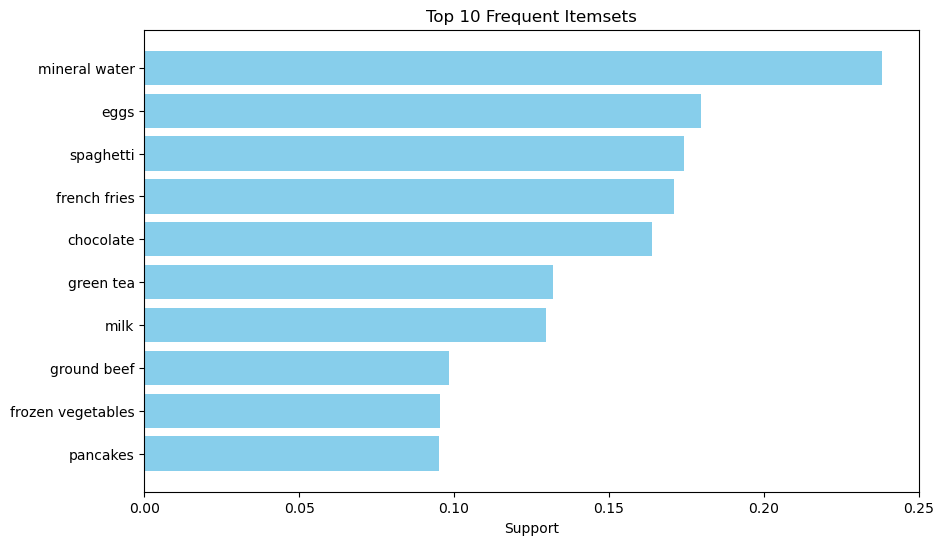

In [94]:
# Top 10 frequent itemsets
top_items = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh([' + '.join(list(i)) for i in top_items['itemsets']], top_items['support'], color='skyblue')
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets')
plt.gca().invert_yaxis()
plt.show()


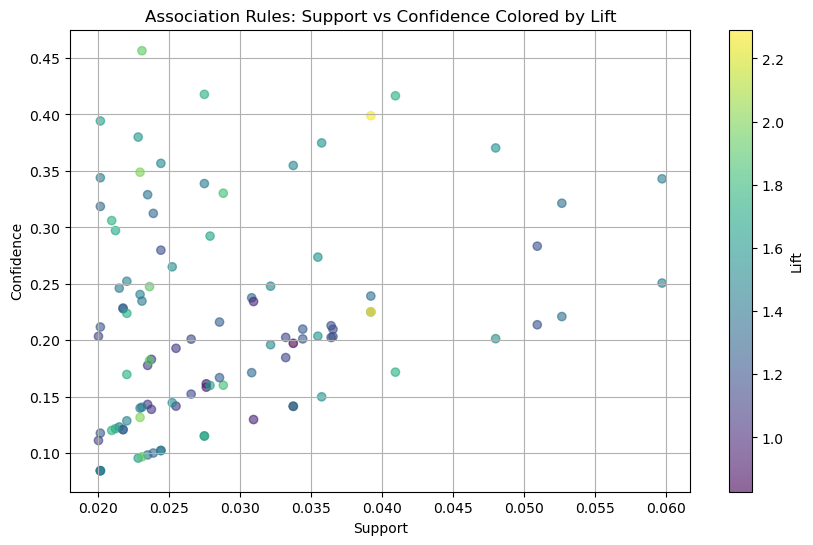

In [96]:
# Relationship between support, confidence, and lift
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence Colored by Lift')
plt.grid(True)
plt.show()

# Interveiw Q/A

A) Lift is a metric which is  used in association rule to measure how much more likely two items are to be bought together than 
if they were bought independently
Importance: -
Removes misleading rules, Highlights valuable insights, Prioritizes marketing efforts

Q) What is support and Confidence. How do you calculate them